
# Imports


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Sequential
from keras import optimizers

from google.colab import drive

drive.mount('/content/gdrive')

Using TensorFlow backend.


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data Load

In [2]:
# load dataset
path = "/content/gdrive/My Drive/Colab Notebooks/" # insert path here
df = pd.read_excel(path+"Real estate valuation data set.xlsx")
df.info()

# Define the variables
No = df['No'].values
X = df.drop(['Y house price of unit area','X1 transaction date', 'No'], axis =1)
y = df['Y house price of unit area'].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


# Split & Normalize Data 

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, No_train, No_test = train_test_split(X, y, No, test_size = 0.2, random_state = 0)

In [0]:
# Normalise and scale the numerical features - X_train
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
mms_X = MinMaxScaler(feature_range=(0, 1))
X_train = mms_X.fit_transform(X_train)

In [0]:
# Normalise and scale the numerical features - X_test
X_test = ss_X.transform(X_test)
X_test = mms_X.transform(X_test)

# Model Setup

In [6]:
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(5,)))
#model.add(Dense(10, activation='sigmoid',))
model.add(Dense(1)) # input shape defined as 10 , output is a single neuron only 1 

sgd = optimizers.SGD(lr=.1, decay=0, momentum=.1)
model.compile(loss='mse',
              optimizer=sgd)
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [7]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)




Epoch 1/50





331/331 [==============================] - 0s 507us/step - loss: 533.4697
Epoch 2/50
331/331 [==============================] - 0s 104us/step - loss: 3542.7404
Epoch 3/50
331/331 [==============================] - 0s 113us/step - loss: 8389.0943
Epoch 4/50
331/331 [==============================] - 0s 106us/step - loss: 6422.7947
Epoch 5/50
331/331 [==============================] - 0s 131us/step - loss: 705.9941
Epoch 6/50
331/331 [==============================] - 0s 119us/step - loss: 380.5039
Epoch 7/50
331/331 [==============================] - 0s 116us/step - loss: 1637.5921
Epoch 8/50
331/331 [==============================] - 0s 102us/step - loss: 1841.0761
Epoch 9/50
331/331 [==============================] - 0s 104us/step - loss: 21361.7924
Epoch 10/50
331/331 [==============================] - 0s 125us/step - loss: 1240.2267
Epoch 11/50
331/331 [==============================] - 0s 94us/step - loss: 330.6777
Epoch 12/50
331/331 [===========================

# Visualization

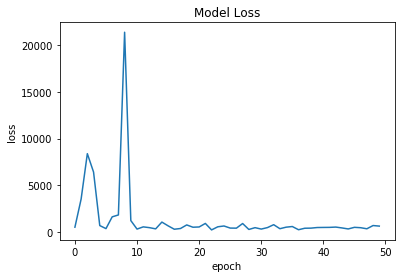

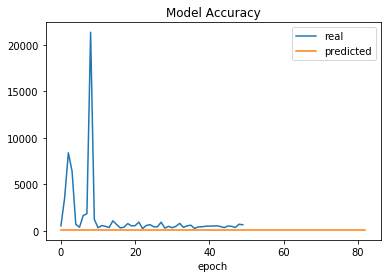

In [8]:
# Predicting the Test set results
y_pred = model.predict(X_test)

fig = plt.figure()

#Create subplot of loss over training epochs.
ax = fig.add_subplot(111)
ax.plot(history.history['loss'])
ax.title.set_text('Model Loss')
plt.ylabel('loss'); plt.xlabel('epoch')

fig1 = plt.figure()
#Create subplot of loss over training epochs.
ax1 = fig1.add_subplot(111)
ax1.plot(history.history['loss'])
ax1.plot(y_pred)
ax1.legend(['real','predicted'])
ax1.title.set_text('Model Accuracy')
plt.xlabel('epoch')

plt.show()

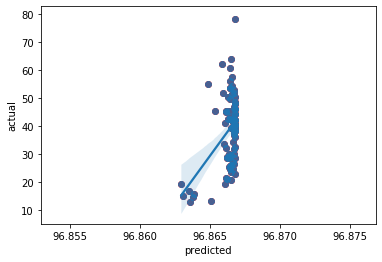

Slope: [6874.9336]
Intercept: -665911.0


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(y_pred,y_test)
plt.scatter(y_pred, y_test, c='r', marker='o')
plt.xlabel('predicted')
plt.ylabel('actual')
sns.regplot(y_pred, y_test)
plt.show()


slope = model.coef_
print('Slope:', slope)

intercept = model.intercept_
print('Intercept:', intercept)
